In [3]:
import pandas as pd 
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns


ModuleNotFoundError: No module named 'seaborn'

In [ ]:
data = pd.read_csv("drive/MyDrive/Datasets/creditcard.csv")

In [ ]:
data.shape

(284807, 31)

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
labels = ["Normal","Fraud"]

In [ ]:
columns = data.columns.to_list()

In [ ]:
columns = [c for c in columns if c not in ["Class"]]
target = "Class"
columns

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [ ]:
x = data[columns]
y = data[target]

In [ ]:
fraud = data[data["Class"] == 1]
normal = data[data["Class"] == 0]
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


([<matplotlib.axis.XTick at 0x7fe7e8071410>,
 [Text(0, 0, 'Normal'), Text(0, 0, 'Fraud')])

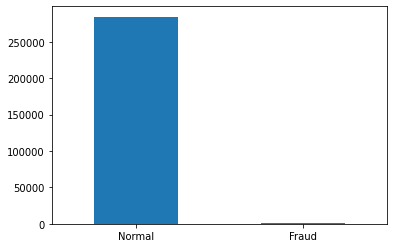

In [ ]:
count_class = pd.value_counts(data["Class"])
count_class.plot(kind = "bar", rot = 0 )
plt.xticks(range(2),labels)

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(random_state = 42)
x_res , y_res = nm.fit_sample(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [ ]:
print(x_res.shape,y_res.shape)

(984, 30) (984,)


([<matplotlib.axis.XTick at 0x7fe7e7fb5610>,
 [Text(0, 0, 'Normal'), Text(0, 0, 'Fraud')])

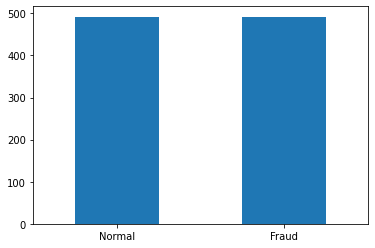

In [ ]:
count_class = pd.value_counts(y_res)
count_class.plot(kind = "bar", rot = 0 )
plt.xticks(range(2),labels)

In [ ]:
from imblearn.combine import SMOTETomek


In [ ]:
smk = SMOTETomek(random_state=42)
x_res_over,y_res_over = smk.fit_sample(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(x_res_over.shape,y_res_over.shape)

(567562, 30) (567562,)


([<matplotlib.axis.XTick at 0x7fe7d46d8350>,
 [Text(0, 0, 'Normal'), Text(0, 0, 'Fraud')])

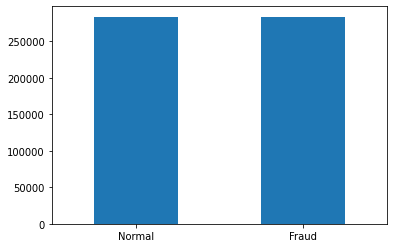

In [ ]:
count_class = pd.value_counts(y_res_over)
count_class.plot(kind = "bar", rot = 0 )
plt.xticks(range(2),labels)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
os = RandomOverSampler(ratio = 0.75)
x_res_ov2 , y_res_ov2 = os.fit_sample(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(x_res_ov2.shape,y_res_ov2.shape)

(497551, 30) (497551,)


([<matplotlib.axis.XTick at 0x7fe7d464af90>,
 [Text(0, 0, 'Normal'), Text(0, 0, 'Fraud')])

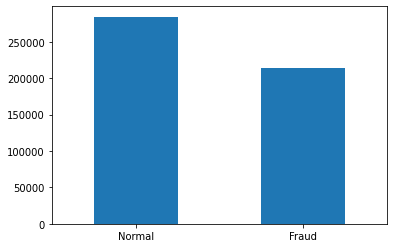

In [ ]:
count_class = pd.value_counts(y_res_ov2)
count_class.plot(kind = "bar", rot = 0 )
plt.xticks(range(2),labels)